In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from itertools import product
from sklearn import preprocessing
from sklearn import cross_validation
from scipy.stats import spearmanr 
import xgboost as xgb
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('../output/dat_prediction 4.csv', index_col=0)

In [3]:
def dataselection(model, m=4):
    model = model.iloc[:,1:]
    
    X = np.array(model)[:,1:] 
    Y = np.array(model)[:,0] 
    
    n = len(model)
    
    X_test = X[:(n + 1) /m]
    Y_test = Y[:(n + 1) /m]
    X_train = X[(n + 1) /m:]
    Y_train = Y[(n + 1) /m:]
    return X_train, Y_train, X_test, Y_test, X, Y

X_train, Y_train, X_test, Y_test, X, Y = dataselection(df, m=4)

def classificationevaluation(Y_test, Y_pred):
    print '======================================'
    n = len(Y_test)
    print 'ar is: ', accuracy_score(list(Y_test), list(Y_pred))
    print 'er is: ', 1-accuracy_score(list(Y_test), list(Y_pred))
    diff = list(Y_test - Y_pred)

    print 'Type I error rate: ',  diff.count(1)/(n+0.0)
    print 'Type II error rate: ', diff.count(-1)/(n+0.0)

In [4]:
#RF
def randomforest():
    print "**************************************"
    tuned_parameters = {"max_depth": [7,9,11, None],
              "max_features": ['auto','sqrt','log2',None]}
    
    clf = RandomForestClassifier(n_estimators = 100)
    
    gs = GridSearchCV(clf, tuned_parameters, cv=5)
    gs.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print(gs.best_params_)

    clf = RandomForestClassifier(**gs.best_params_)
    clfboost = AdaBoostClassifier(clf, n_estimators=50, learning_rate=1.0)
    clfboost.fit(X_train, Y_train)
    
    clf = clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print '======================================'
    print 'Random Forest'
    classificationevaluation(Y_test, y_pred)
    print '======================================'
    print 'adaboost'
    classificationevaluation(Y_test, clfboost.predict(X_test))

In [ ]:
randomforest()

**************************************


In [ ]:
#NB
def NB():
    print "**************************************"
    clf = GaussianNB()
    AdaBoostClassifier(clf, n_estimators=50, learning_rate=1.0)
                            
    clf = clf.fit(X_train, Y_train)
    clfboost = AdaBoostClassifier(clf, n_estimators=50, learning_rate=1.0)
    clfboost.fit(X_train, Y_train)
    
    y_pred = clf.predict(X_test)
    print '======================================'
    print 'NB'
    
    classificationevaluation(Y_test, y_pred)
    print '======================================'
    print 'adaboost'
    classificationevaluation(Y_test, clfboost.predict(X_test))

In [ ]:
NB()

In [ ]:
#XGBoosting
def xgboostresult():
    print "**************************************"
    tuned_parameters = {"max_depth": [3,7,9,11],
                        'n_estimators': [100,200]}

    clf = xgb.XGBClassifier()
    gs = GridSearchCV(clf, tuned_parameters, cv=5)
    gs.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print(gs.best_params_)

    clf = xgb.XGBClassifier(**gs.best_params_)
    clfboost = AdaBoostClassifier(clf, n_estimators=50, learning_rate=1.0)
    clfboost.fit(X_train, Y_train)
    
    clf = clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print '======================================'
    print 'XGBoost'
    classificationevaluation(Y_test, y_pred)
    print '======================================'
    print 'adaboost'
    classificationevaluation(Y_test, clfboost.predict(X_test))

In [ ]:
xgboostresult()

In [ ]:
def KNN():
    print "**************************************"
    tuned_parameters = {"n_neighbors": [5,7,9,11],
              "algorithm": ['auto','ball_tree','kd_tree']}
    
    clf = KNeighborsClassifier(n_neighbors=7)
    gs = GridSearchCV(clf, tuned_parameters, cv=5)
    gs.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print(gs.best_params_)

    clf = KNeighborsClassifier(**gs.best_params_)
    #clfboost = AdaBoostClassifier(clf, n_estimators=50, learning_rate=1.0)
    #clfboost.fit(X_train, Y_train)
    
    clf = clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print '======================================'
    print 'KNN'
    classificationevaluation(Y_test, y_pred)
    print '======================================'
    print 'adaboost'
    #classificationevaluation(Y_test, clfboost.predict(X_test))
    return y_pred, clf.predict_proba(X_test)

In [ ]:
KNN()

In [ ]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X_train, Y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

In [5]:
features = pd.DataFrame([])
features['feature'] = list(df.columns)[2:]
features['rank'] = rfe.ranking_

features_to_save = features[features['rank'] < 50]
features_to_save.to_csv('../output/')
features_to_save

,feature,rank
38,around,30
66,break,39
77,capit,45
93,cia,38
147,economi,31
150,elect,20
194,gas,46
259,jewish,21
297,march,43
301,massiv,42


In [202]:
#top feature seleciton I 
for i in range(10,65,5):
    chosed_features = list(features[features['rank']<i]['feature'])
    features_list = ['Date','Label.x']
    features_list.extend(chosed_features)
    X_train, Y_train, X_test, Y_test, X, Y = dataselection(df[features_list], m=4)
    KNN()
    print 'i is %s'%i

**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.551307847082
er is:  0.448692152918
Type I error rate:  0.297786720322
Type II error rate:  0.150905432596
adaboost
i is 10
**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.565392354125
er is:  0.434607645875
Type I error rate:  0.281690140845
Type II error rate:  0.15291750503
adaboost
i is 15
**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.581488933602
er is:  0.418511066398
Type I error rate:  0.255533199195
Type II error rate:  0.162977867203
adaboost
i is 20
**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.571428571429
er is:  0.428571428571
Type I error rate:  0.27162977867

In [204]:
#top feature seleciton II
for i in range(15,25):
    chosed_features = list(features[features['rank']<i]['feature'])
    features_list = ['Date','Label.x']
    features_list.extend(chosed_features)
    X_train, Y_train, X_test, Y_test, X, Y = dataselection(df[features_list], m=4)
    KNN()
    print 'i is %s'%i

**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.565392354125
er is:  0.434607645875
Type I error rate:  0.281690140845
Type II error rate:  0.15291750503
adaboost
i is 15
**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.565392354125
er is:  0.434607645875
Type I error rate:  0.27967806841
Type II error rate:  0.154929577465
adaboost
i is 16
**************************************
Best parameters set found on development set:
{'n_neighbors': 9, 'algorithm': 'auto'}
KNN
ar is:  0.56338028169
er is:  0.43661971831
Type I error rate:  0.267605633803
Type II error rate:  0.169014084507
adaboost
i is 17
**************************************
Best parameters set found on development set:
{'n_neighbors': 7, 'algorithm': 'auto'}
KNN
ar is:  0.543259557344
er is:  0.456740442656
Type I error rate:  0.263581488934
Typ

In [6]:
#top 22 features are selected

In [9]:
chosed_features = list(features[features['rank']<22]['feature'])
features_list = ['Date','Label.x']
features_list.extend(chosed_features)
X_train, Y_train, X_test, Y_test, X, Y = dataselection(df[features_list], m=4)
y_pred, y_prob = KNN()
y_prob = [item[0] for item in y_prob]

**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.585513078471
er is:  0.414486921529
Type I error rate:  0.263581488934
Type II error rate:  0.150905432596
adaboost


In [220]:
n = len(y_pred)
prediction_result = pd.DataFrame([])
prediction_result['Date'] = df['Date'].iloc[-n:]
prediction_result['ture'] = df['Label.x'].iloc[-n:]
prediction_result['prediction'] = y_pred

In [221]:
prediction_result.to_csv('../output/prediction_result.csv')
prediction_result

,Date,ture,prediction
1492,7/14/2014,0,0.0
1493,7/15/2014,1,1.0
1494,7/16/2014,0,1.0
1495,7/17/2014,1,0.0
1496,7/18/2014,0,0.0
1497,7/21/2014,1,1.0
1498,7/22/2014,1,1.0
1499,7/23/2014,1,0.0
1500,7/24/2014,0,0.0
1501,7/25/2014,0,0.0


In [145]:
#Risk Management: change the threshold for exploratory

In [146]:
# 1 represents price going up
# y_prob < 0.5 means 
# y_prob > 0.5 means 

In [162]:
X_train, Y_train, X_test, Y_test, X, Y = dataselection(df[features_list], m=4)

In [176]:
para = {'n_neighbors': 11, 'algorithm': 'auto'}
clf = KNeighborsClassifier(**para)
clf = clf.fit(X_train, Y_train)
y_prob = clf.predict_proba(X_train)
y_prob = [item[0] for item in y_prob]

In [151]:
price = pd.read_csv('../data/DJIA_table.csv').iloc[0:1492][['Date','Close']]

In [152]:
date = list(price['Date'])
operation = list(y_prob)
price = list(price['Close'])

In [153]:
def thereshold(m, n, short = False):
    holding = range(len(operation))
    holding[0] = price[0] 
    if short == True:
        for i in range(1,len(operation)):
            if operation[i] > m:
                holding[i] = holding[i-1] + (price[i] - price[i-1])  #long
            elif operation[i] < n:
                holding[i] = holding[i-1] - (price[i] - price[i-1])  #short
            else:
                holding[i] = holding[i-1]
        print 'Long Short Strategy'
        
    else:
        for i in range(1,len(operation)):
            if operation[i] > m:
                holding[i] = holding[i-1] + (price[i] - price[i-1])  #hold
            else:
                holding[i] = holding[i-1]
        print 'Long Only Strategy'
        
    plt.plot(price)
    plt.plot(holding)
    
    dji = np.log(price[1:]) - np.log(price[0:-1])
    returns = np.log(holding[1:]) - np.log(holding[0:-1])
    IR = (returns.mean()-dji.mean())/(returns-dji).var()
    
   
    print 'sharp ratio of strategy is: ',returns.mean()/returns.var()
    print 'total returns of strategy is: ',np.log(holding[-1]) - np.log(holding[0])
    print 'sharp ratio of DJI is: ',dji.mean()/dji.var()
    print 'IR is: ', IR
    
    return returns.mean()/returns.var()

In [154]:
#To Do
#1. threshold for long only strategy
#2. threshold for long short strategy

51 1
Long Only Strategy
sharp ratio of strategy is:  0.305615800152
total returns of strategy is:  0.0682166500257
sharp ratio of DJI is:  1.34268414872
IR is:  -5.18793973564
51 6
Long Only Strategy
sharp ratio of strategy is:  0.305615800152
total returns of strategy is:  0.0682166500257
sharp ratio of DJI is:  1.34268414872
IR is:  -5.18793973564
51 11
Long Only Strategy
sharp ratio of strategy is:  0.305615800152
total returns of strategy is:  0.0682166500257
sharp ratio of DJI is:  1.34268414872
IR is:  -5.18793973564
51 16
Long Only Strategy
sharp ratio of strategy is:  0.305615800152
total returns of strategy is:  0.0682166500257
sharp ratio of DJI is:  1.34268414872
IR is:  -5.18793973564
51 21
Long Only Strategy
sharp ratio of strategy is:  0.305615800152
total returns of strategy is:  0.0682166500257
sharp ratio of DJI is:  1.34268414872
IR is:  -5.18793973564
51 26
Long Only Strategy
sharp ratio of strategy is:  0.305615800152
total returns of strategy is:  0.0682166500257
s

,1,6,11,16,21,26,31,36,41,46,51
51,0.305616,0.305616,0.305616,0.305616,0.305616,0.305616,0.305616,0.305616,0.305616,0.305616,0.305616
56,-1.074492,-1.074492,-1.074492,-1.074492,-1.074492,-1.074492,-1.074492,-1.074492,-1.074492,-1.074492,-1.074492
61,-1.074492,-1.074492,-1.074492,-1.074492,-1.074492,-1.074492,-1.074492,-1.074492,-1.074492,-1.074492,-1.074492
66,-0.272942,-0.272942,-0.272942,-0.272942,-0.272942,-0.272942,-0.272942,-0.272942,-0.272942,-0.272942,-0.272942
71,-0.272942,-0.272942,-0.272942,-0.272942,-0.272942,-0.272942,-0.272942,-0.272942,-0.272942,-0.272942,-0.272942
76,2.363615,2.363615,2.363615,2.363615,2.363615,2.363615,2.363615,2.363615,2.363615,2.363615,2.363615
81,2.363615,2.363615,2.363615,2.363615,2.363615,2.363615,2.363615,2.363615,2.363615,2.363615,2.363615
86,11.814913,11.814913,11.814913,11.814913,11.814913,11.814913,11.814913,11.814913,11.814913,11.814913,11.814913
91,18.451674,18.451674,18.451674,18.451674,18.451674,18.451674,18.451674,18.451674,18.451674,18.451674,18.451674
96,18.451674,18.451674,18.451674,18.451674,18.451674,18.451674,18.451674,18.451674,18.451674,18.451674,18.451674


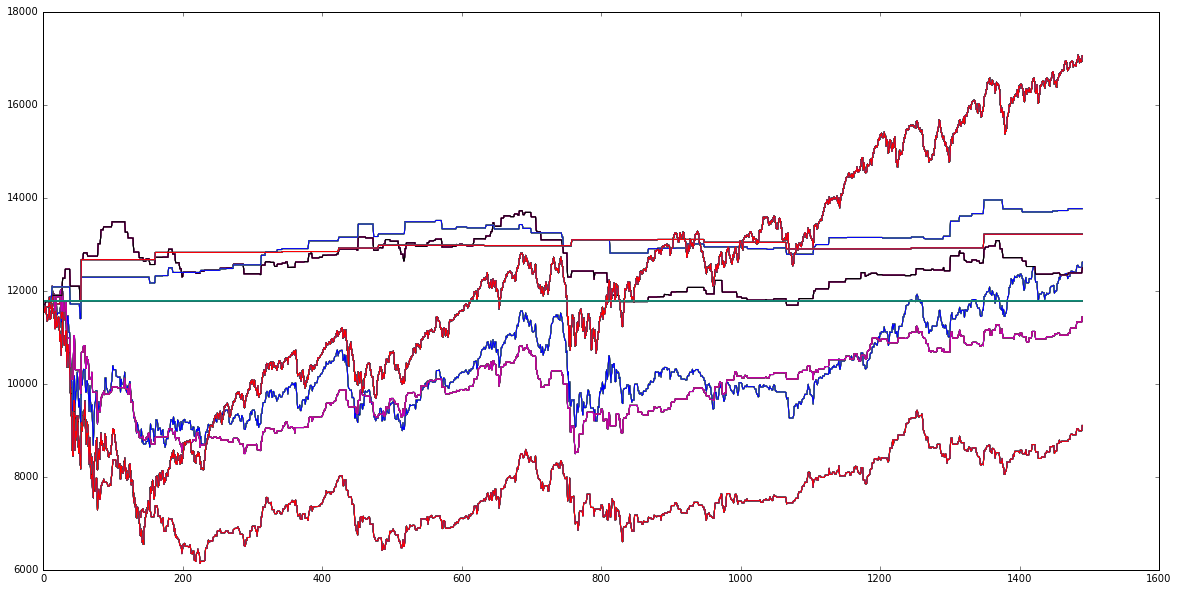

In [156]:
#1. threshold for long only strategy
optlist = pd.DataFrame(index = range(51,105,5), columns = range(1,55,5))
optlist = optlist.fillna(0) 
for i in range(51,105,5):
    for j in range(1,55,5):
        print i, j
        fig = plt.gcf()
        fig.set_size_inches(20, 10)
        optlist.loc[i,j] = thereshold(i/100.0, j/100.0, False)

optlist

Long Short Strategy
sharp ratio of strategy is:  0.959456400846
total returns of strategy is:  0.214094806087
sharp ratio of DJI is:  1.33380062515
IR is:  -2.14997773501


0.95945640084635198

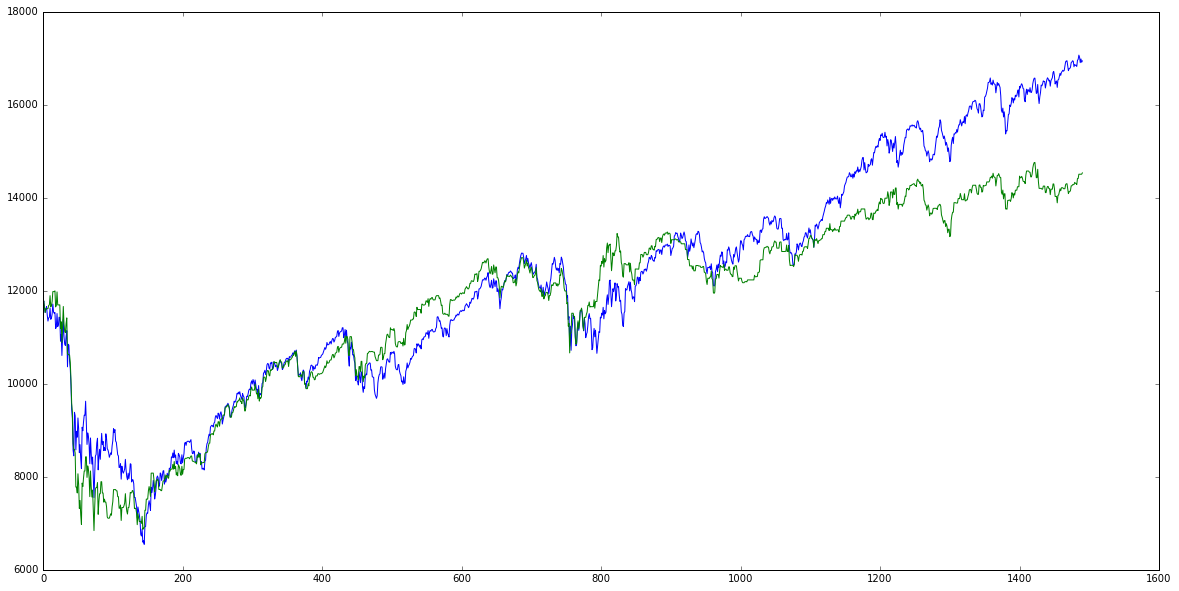

In [129]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(50/100.0, 50/100.0, False)

Long Short Strategy
sharp ratio of strategy is:  11.2732147266
total returns of strategy is:  0.180410618556
sharp ratio of DJI is:  1.33380062515
IR is:  -0.748285378463


11.273214726626009

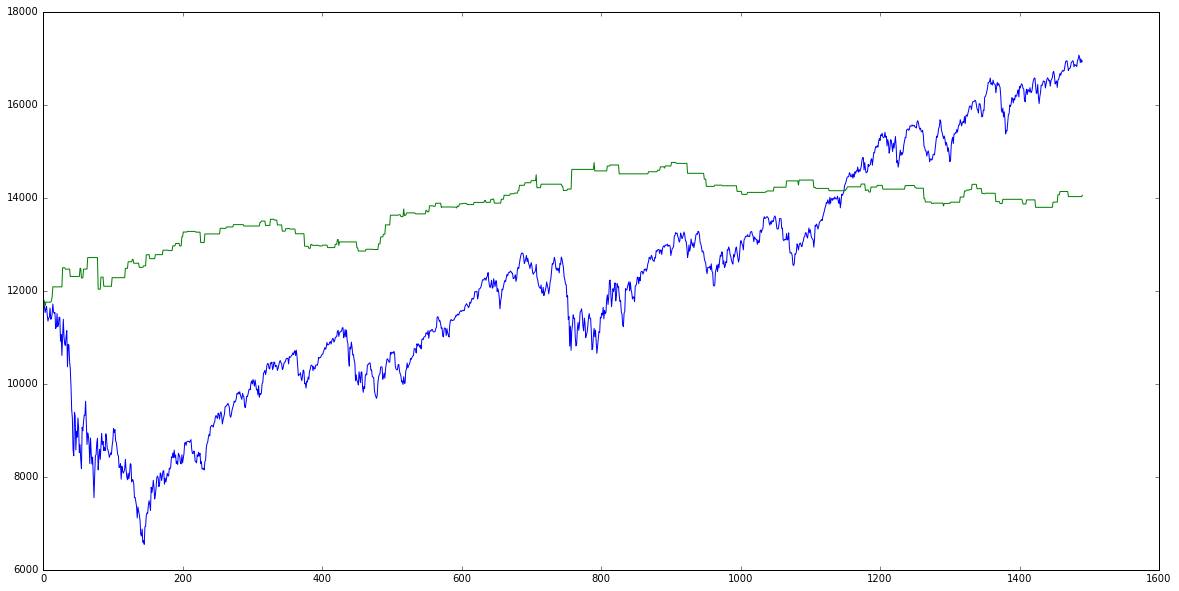

In [138]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(75/100.0, 75/100.0, False)

50 1
Long Only Strategy
sharp ratio of strategy is:  0.0991343973614
total returns of strategy is:  0.0329771059606
sharp ratio of DJI is:  1.33380062515
IR is:  -1.08849218066
50 6
Long Only Strategy
sharp ratio of strategy is:  0.0991343973614
total returns of strategy is:  0.0329771059606
sharp ratio of DJI is:  1.33380062515
IR is:  -1.08849218066
50 11
Long Only Strategy
sharp ratio of strategy is:  0.0991343973614
total returns of strategy is:  0.0329771059606
sharp ratio of DJI is:  1.33380062515
IR is:  -1.08849218066
50 16
Long Only Strategy
sharp ratio of strategy is:  0.0991343973614
total returns of strategy is:  0.0329771059606
sharp ratio of DJI is:  1.33380062515
IR is:  -1.08849218066
50 21
Long Only Strategy
sharp ratio of strategy is:  0.0991343973614
total returns of strategy is:  0.0329771059606
sharp ratio of DJI is:  1.33380062515
IR is:  -1.08849218066
50 26
Long Only Strategy
sharp ratio of strategy is:  0.0991343973614
total returns of strategy is:  0.032977105

,1,6,11,16,21,26,31,36,41,46,51
50,0.099134,0.099134,0.099134,0.099134,0.099134,0.099134,0.099134,0.099134,0.099134,0.099134,0.099134
55,-2.493951,-2.493951,-2.493951,-2.493951,-2.493951,-2.493951,-2.493951,-2.493951,-2.493951,-1.145315,-1.145315
60,-2.493951,-2.493951,-2.493951,-2.493951,-2.493951,-2.493951,-2.493951,-2.493951,-2.493951,-1.145315,-1.145315
65,-1.606302,-1.606302,-1.606302,-1.606302,-1.606302,-1.606302,-1.606302,-1.606302,-2.706692,-1.003317,-1.003317
70,-1.606302,-1.606302,-1.606302,-1.606302,-1.606302,-1.606302,-1.606302,-1.606302,-2.706692,-1.003317,-1.003317
75,-0.415097,-0.415097,-0.415097,-0.415097,-0.415097,-0.415097,-1.283480,-1.283480,-2.657852,-0.119893,-0.119893
80,-0.415097,-0.415097,-0.415097,-0.415097,-0.415097,-0.415097,-1.283480,-1.283480,-2.657852,-0.119893,-0.119893
85,-3.035197,-3.035197,-3.035197,-3.035197,-2.208448,-2.208448,-3.057028,-3.057028,-5.040460,-3.942411,-3.942411
90,-3.035197,-3.035197,-3.035197,-3.035197,-2.208448,-2.208448,-3.057028,-3.057028,-5.040460,-3.942411,-3.942411
95,-2.542946,-2.542946,-2.875913,-2.875913,-1.849545,-1.849545,-2.752376,-2.752376,-4.731254,-3.293746,-3.293746


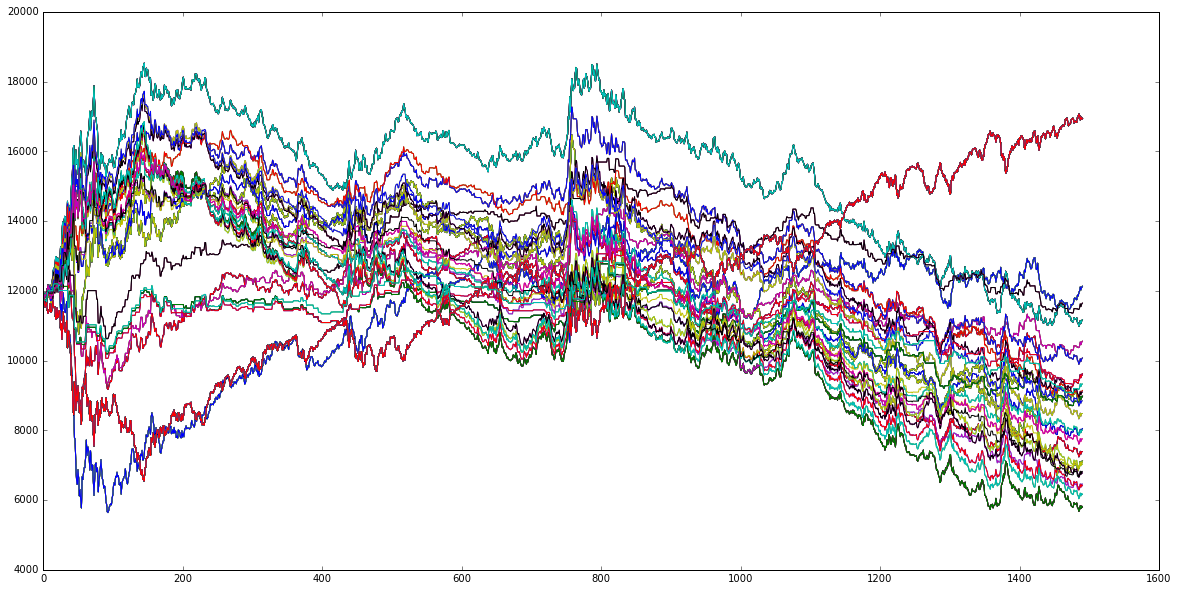

In [139]:
#2. threshold for long short strategy
optlist = pd.DataFrame(index = range(50,105,5), columns = range(1,55,5))
optlist = optlist.fillna(0) 
for i in range(50,105,5):
    for j in range(1,55,5):
        print i, j
        fig = plt.gcf()
        fig.set_size_inches(20, 10)
        optlist.loc[i,j] = thereshold(i/100.0, j/100.0, True)

optlist

Long Short Strategy
sharp ratio of strategy is:  -0.189740663174
total returns of strategy is:  -0.0341017896862
sharp ratio of DJI is:  1.33380062515


-2.2887107171951472e-05

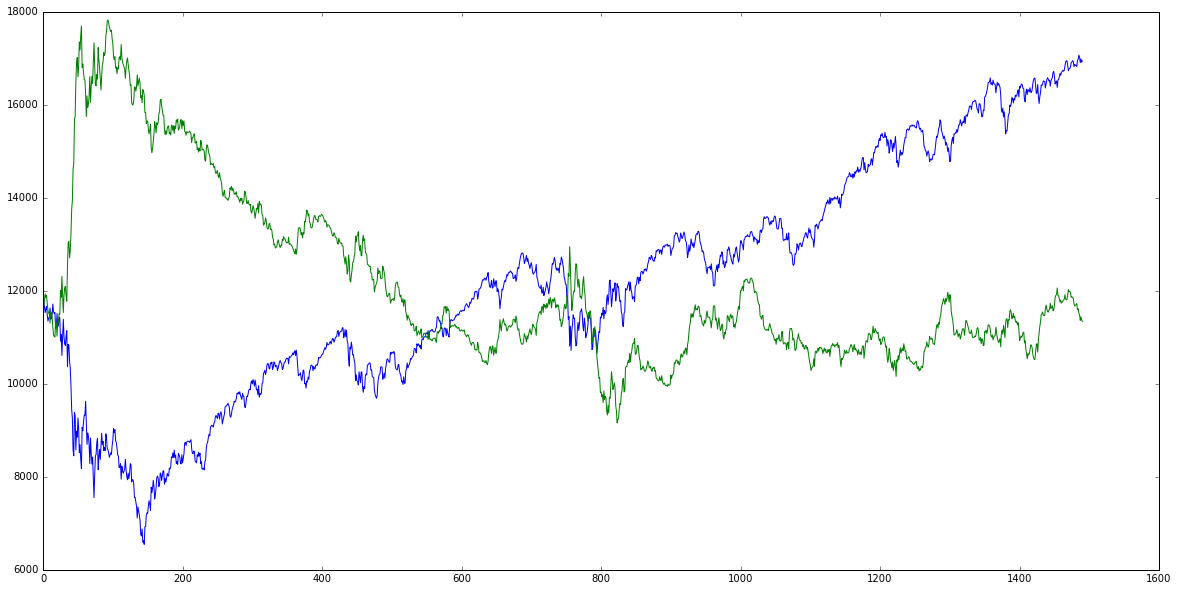

In [48]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(50/100.0, 50/100.0, True)

Long Short Strategy
sharp ratio of strategy is:  1.11389948429
total returns of strategy is:  0.165465842136
sharp ratio of DJI is:  1.33380062515
IR is:  -0.387295405212


-0.38729540521230821

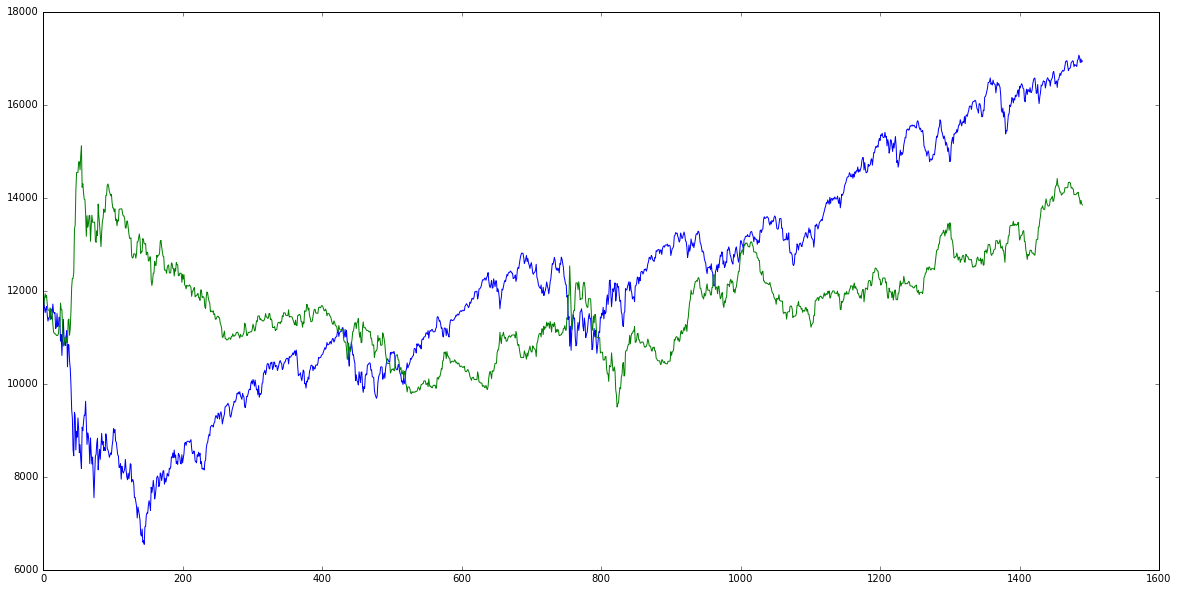

In [68]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(50/100.0, 45/100.0, True)

In [50]:
#backtesting

In [140]:
y_pred, y_prob = KNN()
y_prob = [item[0] for item in y_prob]

**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.585513078471
er is:  0.414486921529
Type I error rate:  0.263581488934
Type II error rate:  0.150905432596
adaboost


In [141]:
price = pd.read_csv('../data/DJIA_table.csv').iloc[1492:,][['Date','Close']]

In [142]:
date = list(price['Date'])
operation = list(y_prob)
price = list(price['Close'])

Long Short Strategy
sharp ratio of strategy is:  -2.30603010907
total returns of strategy is:  -0.0803326716772
sharp ratio of DJI is:  1.20152627403
IR is:  -10.4677563172


-2.3060301090669593

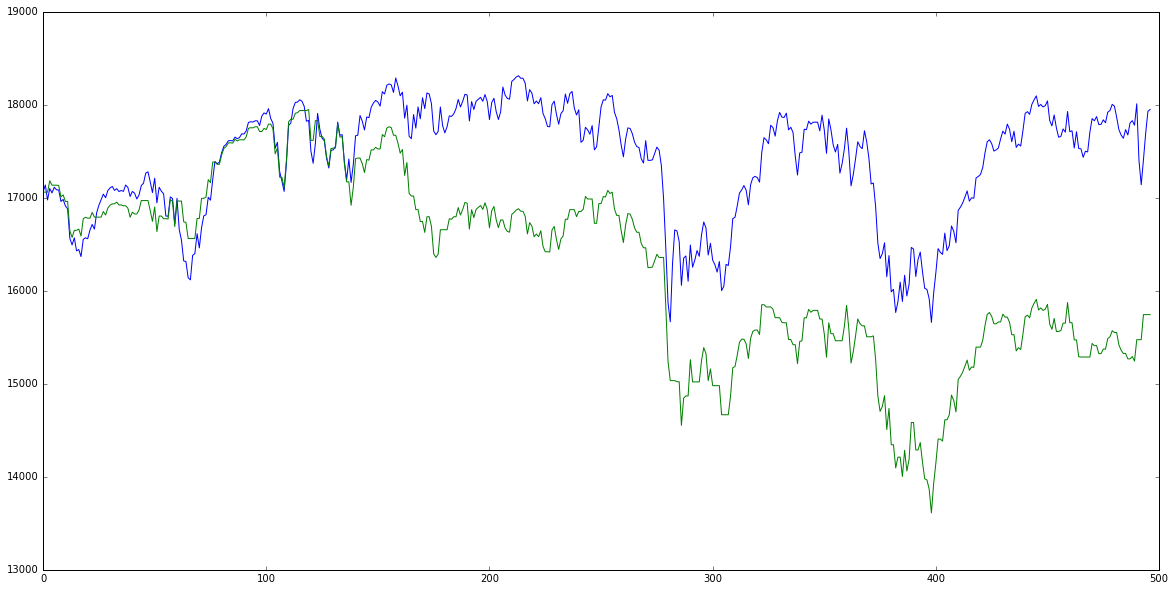

In [144]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(54/100.0, 54/100.0, False)

Long Short Strategy
sharp ratio of strategy is:  7.14633678354
total returns of strategy is:  0.203041271335
sharp ratio of DJI is:  1.20152627403
IR is:  1.67131347795


1.6713134779522567

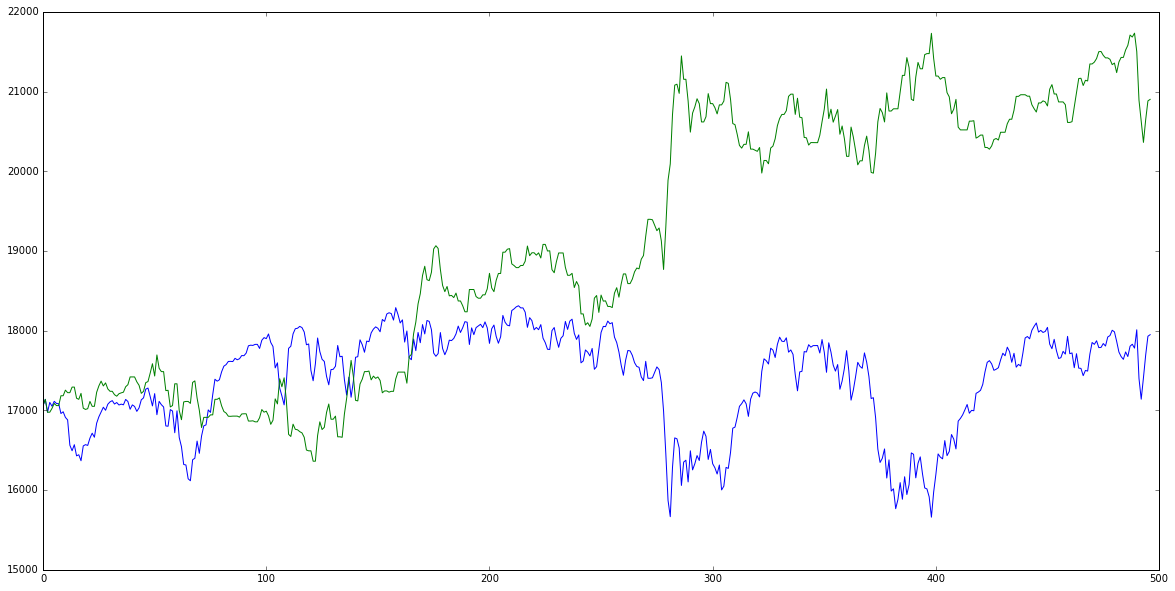

In [73]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(50/100.0, 45/100.0, True)